In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
import scipy
import datetime as dt

%matplotlib inline

In [2]:
"""
    Datasource: http://yann.lecun.com/exdb/mnist/
    The training dataset consists of 60,000 training digits and the test set contains 10,000 samples
    The images in the MNIST dataset consist of pixels, and each pixel is represented by a gray scale intensity value.
    Here, we unroll the pixels into 1D row vectors, which represent the rows in our image array (784 per row or image).
    The second array (labels) returned by the load_mnist function contains the corresponding target variable, 
    the class labels (integers 0-9) of the handwritten digits.
"""

'\n    Datasource: http://yann.lecun.com/exdb/mnist/\n    The training dataset consists of 60,000 training digits and the test set contains 10,000 samples\n    The images in the MNIST dataset consist of pixels, and each pixel is represented by a gray scale intensity value.\n    Here, we unroll the pixels into 1D row vectors, which represent the rows in our image array (784 per row or image).\n    The second array (labels) returned by the load_mnist function contains the corresponding target variable, \n    the class labels (integers 0-9) of the handwritten digits.\n'

In [3]:
training = pd.read_csv("mnist_train.csv", header = None)
testing = pd.read_csv("mnist_test.csv", header = None)

In [4]:

X_train, y_train = training.iloc[:, 1:].values, training.iloc[:, 0].values 
X_test, y_test = testing.iloc[:, 1:].values, testing.iloc[:, 0].values

In [5]:
print("Shape of X_train: ", X_train.shape, "shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape, "shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 784) shape of y_train:  (60000,)
Shape of X_test:  (10000, 784) shape of y_test:  (10000,)


Text(0, 0.5, 'Frequency (normed)')

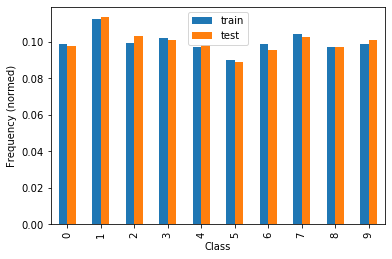

In [6]:
label_counts = pd.DataFrame({
    "train": pd.Series(y_train).value_counts().sort_index(), 
    "test": pd.Series(y_test).value_counts().sort_index()
})
(label_counts / label_counts.sum()).plot.bar()

plt.xlabel("Class")
plt.ylabel("Frequency (normed)")

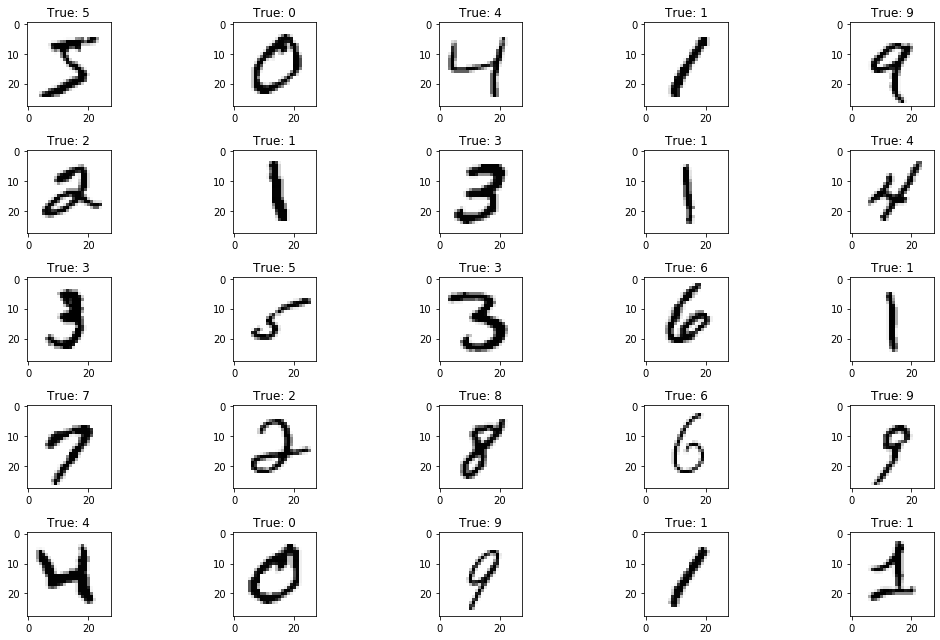

In [7]:
fig, axes = plt.subplots(5, 5, figsize = (15, 9))
for i, ax in enumerate(fig.axes):
    img = X_train[i, :].reshape(28, 28)
    ax.imshow(img, cmap = "Greys", interpolation="nearest")
    ax.set_title("True: %i" % y_train[i])
plt.tight_layout()

# Feature scaling

In [8]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train.astype(np.float64))
X_test_std = scaler.transform(X_test.astype(np.float64))

In [9]:
print("BEFORE SCALING")
print(X_train[1][150:160])

print("\n\nAFTER SCALING")
print(X_train_std[1][150:160])

BEFORE SCALING
[  0   0   0   0  48 238 252 252 252 237]


AFTER SCALING
[-0.42253575 -0.51540865 -0.61603533 -0.7159833  -0.34621732  1.35857324
  1.51146014  1.6346726   1.88069283  2.09129319]


In [10]:
%%time 
lr = linear_model.LogisticRegression()
lr.fit(X_train_std, y_train)
print("accuracy:", lr.score(X_test_std, y_test))

accuracy: 0.9246
Wall time: 30.9 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
##### SVM ALGORITHM #####
param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma)

In [ ]:
start_time = dt.datetime.now()
#print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train_std, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

# Display wrong predictions

In [ ]:
miss_indices = (y_test != y_test_pred)
misses = X_test[miss_indices]
print("No of miss: ", misses.shape[0])

fig, axes = plt.subplots(10, 5, figsize = (15, 20))
misses_actual = y_test[miss_indices]
misses_pred = y_test_pred[miss_indices]

for i, ax in enumerate(fig.axes):
    img = misses[i].reshape(28, 28)
    ax.imshow(img, cmap = "Greys", interpolation="nearest")
    ax.set_title("A: %s, P: %d" % (misses_actual[i], misses_pred[i]))
plt.tight_layout()

# Result

In [ ]:
print(r"Logistic Regression Accuracy : {lr.score(X_test_std, y_test)}.")
expected = y_test
predicted = classifier.predict(X_test)

show_some_digits(X_test,predicted,title_text="Predicted {}")

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

plot_confusion_matrix(cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))